Read the GRIB file.

In [1]:
import pygrib

msgs = pygrib.open("ERA5_bigger_5e463e332dc362754a40bad4c54d8a6d.grib")
msgs

Look into it.

In [2]:
for msg in msgs[1:5]:
    print(msg)

1:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 200106010000
2:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 200106010600
3:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 200106011200
4:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 200106011800


In [3]:
msgs[1].keys()

['globalDomain',
 'GRIBEditionNumber',
 'eps',
 'offsetSection0',
 'section0Length',
 'totalLength',
 'editionNumber',
 'WMO',
 'productionStatusOfProcessedData',
 'section1Length',
 'wrongPadding',
 'table2Version',
 'centre',
 'centreDescription',
 'generatingProcessIdentifier',
 'gridDefinition',
 'indicatorOfParameter',
 'parameterName',
 'parameterUnits',
 'indicatorOfTypeOfLevel',
 'pressureUnits',
 'typeOfLevelECMF',
 'typeOfLevel',
 'level',
 'yearOfCentury',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'unitOfTimeRange',
 'P1',
 'P2',
 'timeRangeIndicator',
 'numberIncludedInAverage',
 'numberMissingFromAveragesOrAccumulations',
 'centuryOfReferenceTimeOfData',
 'subCentre',
 'paramIdECMF',
 'paramId',
 'cfNameECMF',
 'cfName',
 'cfVarNameECMF',
 'cfVarName',
 'unitsECMF',
 'units',
 'nameECMF',
 'name',
 'decimalScaleFactor',
 'setLocalDefinition',
 'optimizeScaleFactor',
 'dataDate',
 'year',
 'dataTime',
 'julianDay',
 'stepUnits',
 'stepType',
 'stepRange',
 'startSte

In [4]:
msgs[1]["latLonValues"].shape

(410400,)

In [5]:
print(msgs[1]["values"].shape)
print(msgs[1]["latitudes"].shape, msgs[1]["longitudes"].shape)
print(msgs[1]["distinctLatitudes"].shape, msgs[1]["distinctLongitudes"].shape)

print(msgs[2]["values"].shape)
print(msgs[2]["latitudes"].shape, msgs[2]["longitudes"].shape)
print(msgs[2]["distinctLatitudes"].shape, msgs[2]["distinctLongitudes"].shape)

(95, 1440)
(136800,) (136800,)
(95,) (1440,)
(95, 1440)
(136800,) (136800,)
(95,) (1440,)


Hence, every `msg` contains the 2-m-temperatures for all positions of a $95\times 1440 = 136800$ gridded Arctic regions.

In [6]:
print(str(msgs[7]["date"]), ",", str(msgs[7]["hour"]))

20010603 , 12


In [7]:
msgs[1]["values"].flatten().mean()

270.3348528624417

In [8]:
import numpy as np
ts_spatialAvgTemp = np.array([]) # time series of temperatures after spatial averaging
msgs.rewind()
for msg in msgs:
    ts_spatialAvgTemp = np.append(ts_spatialAvgTemp, msg["values"].flatten().mean())
    
ts_spatialAvgTemp

array([270.33485286, 270.46593835, 270.48454201, ..., 274.52131548,
       274.47348   , 274.28007572])

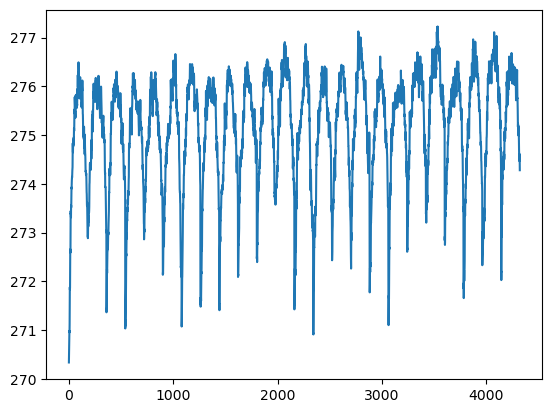

In [9]:
import matplotlib.pyplot as plt
plt.plot(ts_spatialAvgTemp)

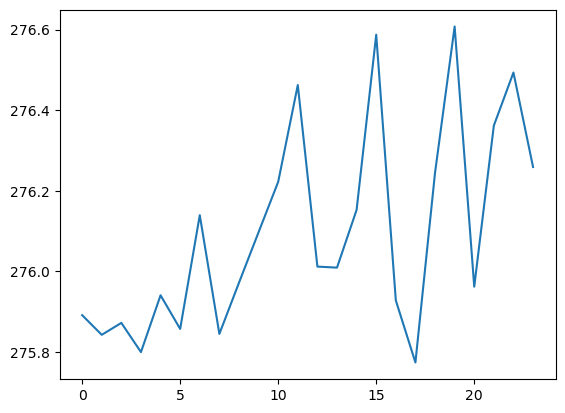

In [10]:
ts_annualAvgSpatialAvgTemp = np.array([]) # further averaging over the summer for every year
for y in range(24): # 2001, 2002, ... , 2024
    ts_annualAvgSpatialAvgTemp = np.append(
        ts_annualAvgSpatialAvgTemp, 
        ts_spatialAvgTemp[180*y+60:180*(y+1)-60].mean())
        
plt.plot(ts_annualAvgSpatialAvgTemp)

Text(0, 0.5, '2m-temp (K)')

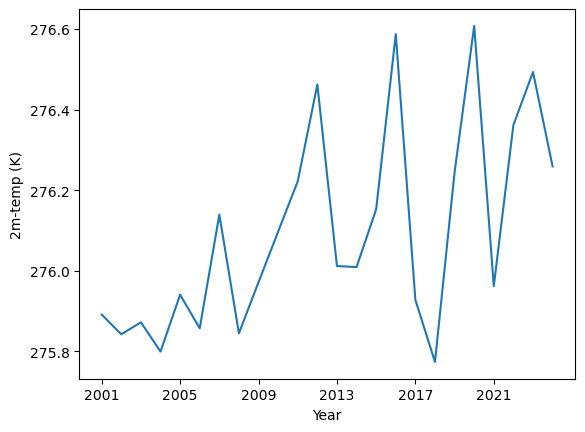

In [15]:
plt.plot(ts_annualAvgSpatialAvgTemp)
plt.xlabel("Year")
# set the x-axis to be year 2001, 2002, ..., 2024, but only show every 4 years
plt.xticks(np.arange(0, 24, 4), np.arange(2001, 2025, 4))
plt.ylabel("2m-temp (K)")

In [11]:
msgs.close()